### NOTES UP HERE:

This is a TIMESERIES dataframe. Possibly, sample the data into different heats. From beginning to end. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasgui import show

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('data/sulatto_fulldata2025_version2.csv', delimiter=";", index_col=None)

C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_153904\3465785326.py:1: DtypeWarning:

Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
#show(df)

In [ ]:
df

KeyboardInterrupt: 

In [ ]:
df['Route'].nunique()
# This can be dropped

1

In [ ]:
df['CCM.MIX. Concentration factor Value'].nunique()

1001

In [ ]:
df['Weight'].nunique()

1079

In [ ]:
df['Thickness'].nunique()
# Can be dropped

1

In [ ]:
df['Length'].nunique()

268

In [ ]:
df['Width'].nunique()

37

COMMAS INTO DOTS

In [ ]:
df['Length'] = df['Length'].str.replace(',','.')
df['Thickness'] = df['Thickness'].str.replace(',','.')
df['CCM.TD. Steel weight in tundish Value'] = df['CCM.TD. Steel weight in tundish Value'].str.replace(',','.')
df['CCM.STR. Speed - Mold avg Value'] = df['CCM.STR. Speed - Mold avg Value'].str.replace(',','.')

We could maybe use Thickness * Length * Width to calculate Volume of slabs, to reduce the amount of columns.

In [ ]:
df['Width'] = df['Width'].astype(float) / 1000
df['Thickness'] = df['Thickness'].astype(float) / 1000

df['Slab_volume^m3'] = df['Width'].astype(float) * df['Length'].astype(float) * df['Thickness'].astype(float)
df['Slab_volume^m3'] = df['Slab_volume^m3'].round(2)

In [ ]:
df['Material Type'].value_counts()

Material Type
slab    677815
Name: count, dtype: int64

In [ ]:
df['CCM.TD. Heat counter Value'].value_counts()

CCM.TD. Heat counter Value
1.0     97364
2.0     94453
3.0     94178
4.0     89181
5.0     83450
6.0     78774
7.0     72487
8.0     64651
9.0      2094
10.0      667
Name: count, dtype: int64

DROPS HERE

In [ ]:
df = df.drop('CCM.TD. Slag powder Value', axis=1)
df = df.drop('CCM.TD. TD internals type Value', axis=1)
df = df.drop('Route', axis=1)
df = df.drop('Width', axis=1)
df = df.drop('Thickness', axis=1)
df = df.drop('Length', axis=1)
df = df.drop('Material Type', axis=1)

In [ ]:
df['SlabNo_in_Heat'].value_counts()

SlabNo_in_Heat
3    103909
1    103869
2    103774
4    103052
5    101168
6     81821
7     26115
2      7849
3      7783
1      7779
4      7734
5      7519
6      6214
8      4193
7      2475
8      1264
9       762
9       303
A       232
Name: count, dtype: int64

In [ ]:
df['CCM.TD. Steel weight in tundish Value'].nunique()

240

In [ ]:
df['CCM.TD. Tundish inflow Value'].nunique()

1533

In [ ]:
df['CCM.TD. Stopper Last Position Value'].nunique()

534

In [ ]:
df['CCM.TD. Stopper position min Value'].nunique()

548

In [ ]:
df['CCM.TD. Stopper pos chg max segment Value'].nunique()

137

In [ ]:
df['CCM.TD. Stopper position chg 10 s Value'].nunique()

103

In [ ]:
df['CCM.SEN. SEN Type Value'].value_counts()


CCM.SEN. SEN Type Value
Product 1    471397
Product 2    200963
Name: count, dtype: int64

In [ ]:
data1 = df.corr(numeric_only=True)

<Axes: >

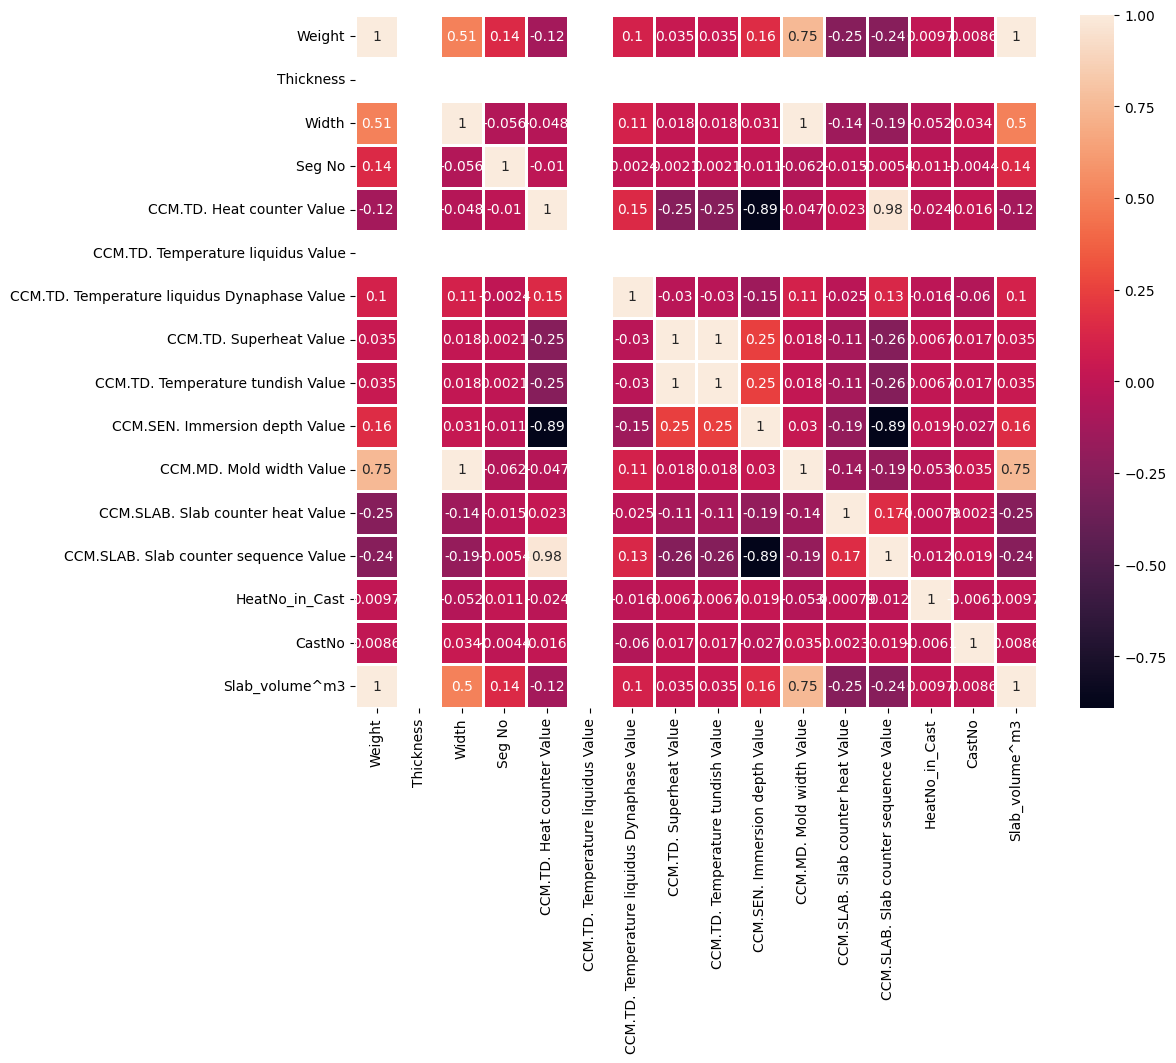

In [ ]:
plt.figure(figsize=(11, 9))
sns.heatmap(data1, annot=True, linewidths=1)

In [ ]:
df["CCM.TD. Temperature liquidus Value"].value_counts()

CCM.TD. Temperature liquidus Value
1455.0    677299
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Material Type                                      0
End time                                           0
Route                                              0
Weight                                             0
Length                                             0
Thickness                                          0
Width                                              0
Grade                                              0
Quality Status                                     0
Seg No                                             0
Seg from                                           0
Seg to                                             0
CCM.TD. Heat counter Value                       516
CCM.TD. Temperature liquidus Value               516
CCM.TD. Temperature liquidus Dynaphase Value     516
CCM.TD. Stopper Type Value                      2287
CCM.TD. Steel weight in tundish Value            516
CCM.TD. Tundish inflow Value                    1184
CCM.TD. Stopper Last Position Value           

In [ ]:
df['Quality Status'].value_counts()

Quality Status
OK         531731
WARNING    103772
ERROR       42312
Name: count, dtype: int64